In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
tracks = pd.read_csv('tracks.csv')
artists = pd.read_csv('artists.csv')

In [3]:
tracks.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [4]:
artists.head()

,id,followers,genres,name,popularity
0,0DheY5irMjBUeLybbCUEZ2,0.0,[],Armid & Amir Zare Pashai feat. Sara Rouzbehani,0
1,0DlhY15l3wsrnlfGio2bjU,5.0,[],ปูนา ภาวิณี,0
2,0DmRESX2JknGPQyO15yxg7,0.0,[],Sadaa,0
3,0DmhnbHjm1qw6NCYPeZNgJ,0.0,[],Tra'gruda,0
4,0Dn11fWM7vHQ3rinvWEl4E,2.0,[],Ioannis Panoutsopoulos,0


In [5]:
tracks.isnull().sum() 

id                   0
name                71
popularity           0
duration_ms          0
explicit             0
artists              0
id_artists           0
release_date         0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
dtype: int64

In [6]:
artists.isnull().sum()

id             0
followers     13
genres         0
name           3
popularity     0
dtype: int64

In [7]:
artists.shape

(1104349, 5)

In [8]:
tracks.shape

(586672, 20)

In [9]:
tracks=tracks.dropna(subset=['name'])

In [10]:
artists=artists.dropna(subset=['followers','name'])

In [11]:
artists.duplicated().sum()  

np.int64(0)

In [12]:
tracks.duplicated().sum()

np.int64(0)

In [13]:
artists.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1104333 entries, 0 to 1104348
Data columns (total 5 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   id          1104333 non-null  object 
 1   followers   1104333 non-null  float64
 2   genres      1104333 non-null  object 
 3   name        1104333 non-null  object 
 4   popularity  1104333 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 50.6+ MB


In [14]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
Index: 586601 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586601 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586601 non-null  int64  
 3   duration_ms       586601 non-null  int64  
 4   explicit          586601 non-null  int64  
 5   artists           586601 non-null  object 
 6   id_artists        586601 non-null  object 
 7   release_date      586601 non-null  object 
 8   danceability      586601 non-null  float64
 9   energy            586601 non-null  float64
 10  key               586601 non-null  int64  
 11  loudness          586601 non-null  float64
 12  mode              586601 non-null  int64  
 13  speechiness       586601 non-null  float64
 14  acousticness      586601 non-null  float64
 15  instrumentalness  586601 non-null  float64
 16  liveness          586601 

In [15]:
tracks['year'] = pd.to_datetime(tracks['release_date'], errors='coerce').dt.year


In [16]:
tracks['energy_level'] = pd.cut(tracks['energy'],
                                 bins=[0,0.3,0.7,1],
                                 labels=['Low','Medium','High'])

C:\Users\hp\AppData\Local\Temp\ipykernel_8844\63692915.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_artists, x='popularity', y='artists', palette='viridis')


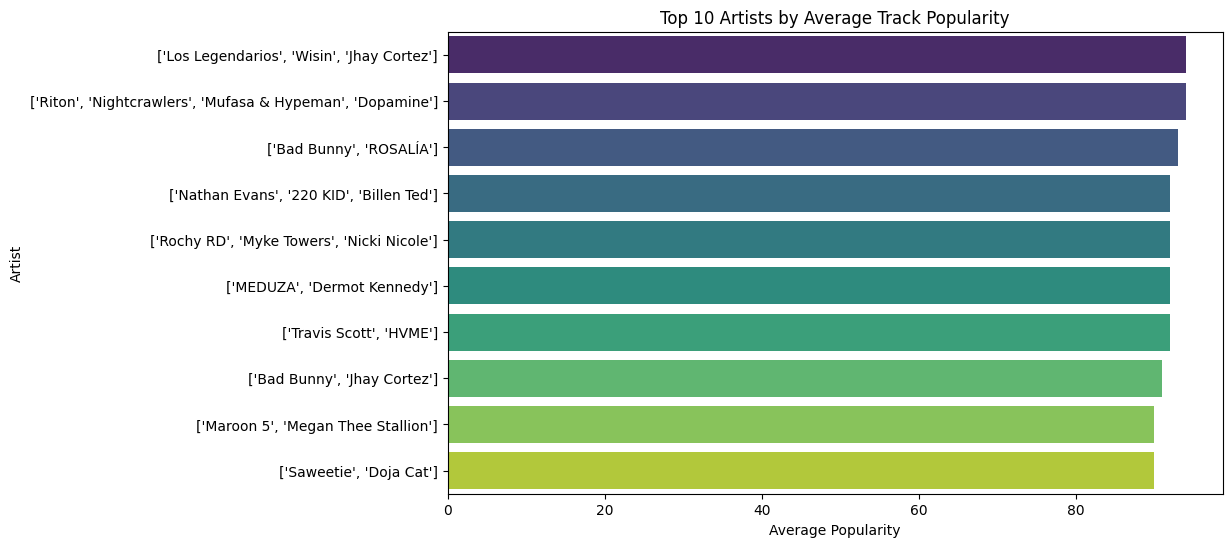

In [ ]:
artist_popularity = tracks.groupby('artists')['popularity'].mean().reset_index()
artist_popularity['artist_rank'] = artist_popularity['popularity'].rank(ascending=False)

top_artists = artist_popularity.sort_values('artist_rank').head(10)
plt.figure(figsize=(10,6))
sns.barplot(data=top_artists, x='popularity', y='artists', palette='viridis')
plt.title("Top 10 Artists by Average Track Popularity")
plt.xlabel("Average Popularity")
plt.ylabel("Artist")
plt.show()

In [21]:
tracks.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
popularity,586601.0,27.573212,18.369417,0.0,13.0000,27.000000,41.00000,100.000
duration_ms,586601.0,230054.852626,126532.824981,3344.0,175083.0000,214907.000000,263867.00000,5621218.000
explicit,586601.0,0.044091,0.205298,0.0,0.0000,0.000000,0.00000,1.000
danceability,586601.0,0.563612,0.166101,0.0,0.4530,0.577000,0.68600,0.991
energy,586601.0,0.542071,0.251910,0.0,0.3430,0.549000,0.74800,1.000
key,586601.0,5.221594,3.519420,0.0,2.0000,5.000000,8.00000,11.000
loudness,586601.0,-10.205789,5.089422,-60.0,-12.8910,-9.242000,-6.48100,5.376
mode,586601.0,0.658797,0.474114,0.0,0.0000,1.000000,1.00000,1.000
speechiness,586601.0,0.104870,0.179902,0.0,0.0340,0.044300,0.07630,0.971
acousticness,586601.0,0.449803,0.348812,0.0,0.0969,0.422000,0.78400,0.996


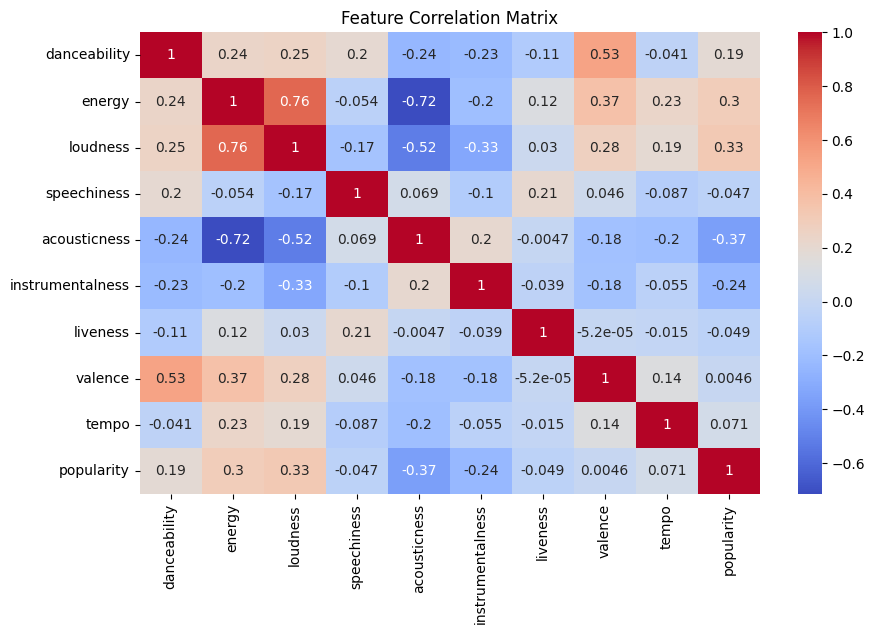

In [23]:
audio_features = [
    'danceability','energy','loudness','speechiness',
    'acousticness','instrumentalness','liveness','valence','tempo'
]

plt.figure(figsize=(10,6))
sns.heatmap(tracks[audio_features + ['popularity']].corr(),
            annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()


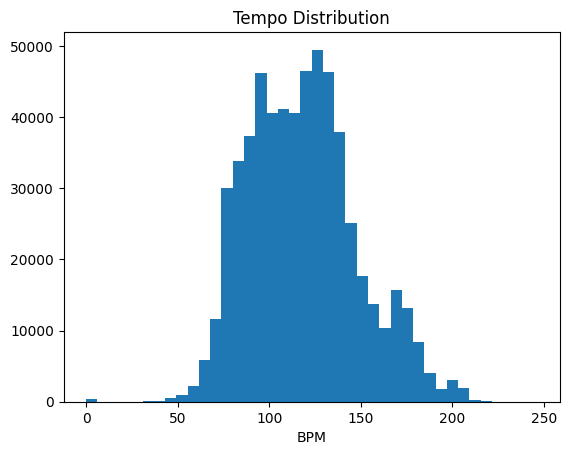

In [25]:
plt.hist(tracks['tempo'], bins=40)
plt.title("Tempo Distribution")
plt.xlabel("BPM")
plt.show()

f:\jupyter files\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


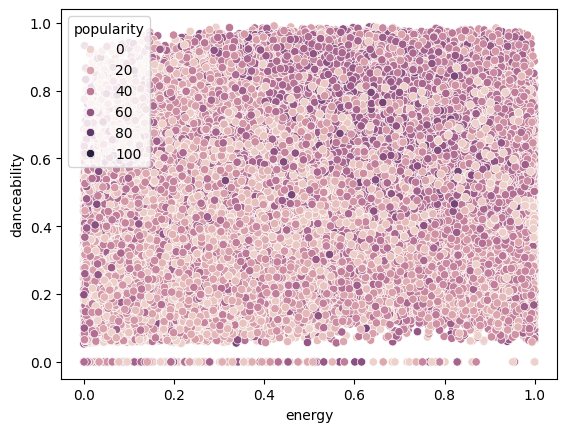

In [26]:
sns.scatterplot(x='energy', y='danceability',
                hue='popularity', data=tracks)
plt.show()

<Axes: ylabel='tempo'>

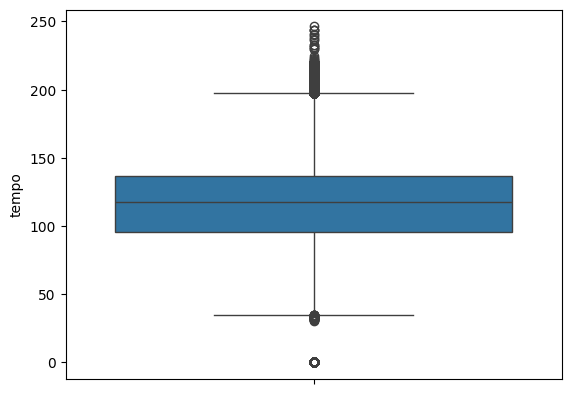

In [27]:
sns.boxplot(tracks['tempo'])

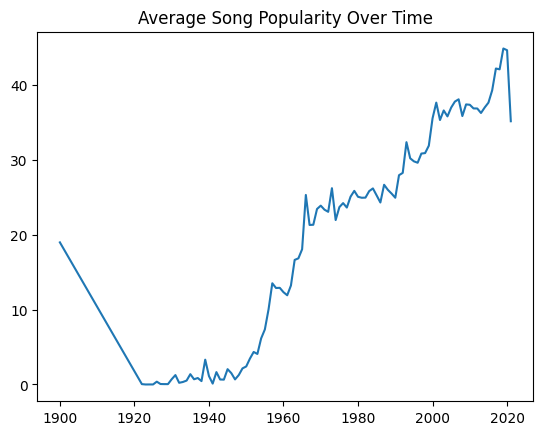

In [28]:
yearly_popularity = tracks.groupby('year')['popularity'].mean()

plt.plot(yearly_popularity)
plt.title("Average Song Popularity Over Time")
plt.show()

In [38]:
corr_with_popularity = tracks[audio_features + ['popularity']].corr()['popularity']
print(corr_with_popularity.sort_values(ascending=False))

popularity          1.000000
loudness            0.327001
energy              0.302178
danceability        0.186878
tempo               0.071223
valence             0.004558
speechiness        -0.047415
liveness           -0.048735
instrumentalness   -0.236403
acousticness       -0.370723
Name: popularity, dtype: float64


In [39]:
# High Energy Party Playlist:

party_playlist = tracks[
    (tracks['danceability'] > 0.7) &
    (tracks['energy'] > 0.7) &
    (tracks['tempo'] > 110)
]
party_playlist[['name','artists','popularity']].head(10)

,name,artists,popularity
609,Beis Ep,['Macarti'],0
999,Stompin' at the Savoy - Mix One,['Lionel Hampton Orchestra'],0
4063,The Storm,['Shungi Music Crew'],0
4070,According Deep Salvation,"['Dj Phuta', 'African Doctor']",0
4187,Africanasim,['Shungi Music Crew'],0
4326,Falling in Love,['InNeR ChiLd'],0
4426,The Pointor,['Shungi Music Crew'],0
4568,Broken City,['Shungi Music Crew'],0
4633,Boliqua,['Toy Souljah'],0
4843,Cant Be There,['Shungi Music Crew'],0


In [40]:
# Chill Acoustic Playlist:

chill_playlist = tracks[
    (tracks['acousticness'] > 0.6) &
    (tracks['energy'] < 0.4)
]
chill_playlist[['name','artists','popularity']].head(10)

,name,artists,popularity
1,Capítulo 2.16 - Banquero Anarquista,['Fernando Pessoa'],0
2,Vivo para Quererte - Remasterizado,['Ignacio Corsini'],0
3,El Prisionero - Remasterizado,['Ignacio Corsini'],0
4,Lady of the Evening,['Dick Haymes'],0
5,Ave Maria,['Dick Haymes'],0
6,La Butte Rouge,['Francis Marty'],0
7,La Java,['Mistinguett'],0
9,Martín Fierro - Remasterizado,['Ignacio Corsini'],0
10,Capítulo 2.8 - Banquero Anarquista,['Fernando Pessoa'],0
13,Tu Verras Montmartre,['Lucien Boyer'],1


In [25]:
artists['genres_list'] = artists['genres'].str.strip("[]").str.split(", ")
artists_exploded = artists.explode('genres_list')

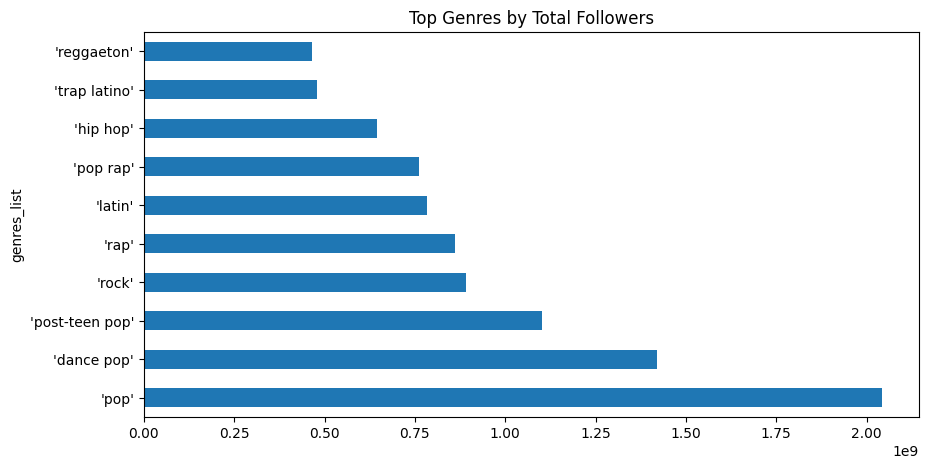

In [30]:
top_genres = artists_exploded.groupby('genres_list')['followers'] \
                             .sum().sort_values(ascending=False).head(10)

top_genres.plot(kind='barh', figsize=(10,5))
plt.title("Top Genres by Total Followers")
plt.show()


In [32]:
a=tracks.sort_values('popularity',ascending=True)[0:10]
a[['name','popularity']]

,name,popularity
94,Chapter 1.4 - Szkolne przygody Pimpusia Sadełko,0
95,Elle Vendait Des P'tits Gateaux,0
96,Hush-A-Bye (Wee Rose of Kilarney),0
97,Capítulo 2.23 - Banquero Anarquista,0
98,Cap Polonio - Remasterizado,0
88,Capítulo 2.11 - Banquero Anarquista,0
14,Elle Prend L'boulevard Magenta,0
15,Capítulo 1.23 - Banquero Anarquista,0
144,Antoine,0
145,Capítulo 1.19 - Banquero Anarquista,0


In [34]:
tracks.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
popularity,586601.0,27.573212,18.369417,0.0,13.0000,27.000000,41.00000,100.000
duration_ms,586601.0,230054.852626,126532.824981,3344.0,175083.0000,214907.000000,263867.00000,5621218.000
explicit,586601.0,0.044091,0.205298,0.0,0.0000,0.000000,0.00000,1.000
danceability,586601.0,0.563612,0.166101,0.0,0.4530,0.577000,0.68600,0.991
energy,586601.0,0.542071,0.251910,0.0,0.3430,0.549000,0.74800,1.000
key,586601.0,5.221594,3.519420,0.0,2.0000,5.000000,8.00000,11.000
loudness,586601.0,-10.205789,5.089422,-60.0,-12.8910,-9.242000,-6.48100,5.376
mode,586601.0,0.658797,0.474114,0.0,0.0000,1.000000,1.00000,1.000
speechiness,586601.0,0.104870,0.179902,0.0,0.0340,0.044300,0.07630,0.971
acousticness,586601.0,0.449803,0.348812,0.0,0.0969,0.422000,0.78400,0.996


In [35]:
a=tracks
b=a[a['popularity']>90].sort_values('popularity',ascending=False)[:10]
b[['name','popularity','artists']]

,name,popularity,artists
93802,Peaches (feat. Daniel Caesar & Giveon),100,"['Justin Bieber', 'Daniel Caesar', 'Giveon']"
93803,drivers license,99,['Olivia Rodrigo']
93804,Astronaut In The Ocean,98,['Masked Wolf']
92811,telepatía,97,['Kali Uchis']
92810,Save Your Tears,97,['The Weeknd']
92813,Blinding Lights,96,['The Weeknd']
93805,Leave The Door Open,96,"['Bruno Mars', 'Anderson .Paak', 'Silk Sonic']"
92814,The Business,95,['Tiësto']
91866,Streets,94,['Doja Cat']
93806,Fiel,94,"['Los Legendarios', 'Wisin', 'Jhay Cortez']"


In [36]:
tracks.set_index('release_date', inplace=True)
tracks.index = pd.to_datetime(tracks.index, errors='coerce', format='mixed')
years = tracks.index.year
tracks.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,hit
release_date,,,,,,,,,,,,,,,,,,,,
1922-02-22,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3,False
1922-06-01,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1,False
1922-03-21,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5,False
1922-03-21,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3,False
1922-01-01,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4,False


In [37]:
tracks[['artists']].iloc[18]

artists    ['Victor Boucher']
Name: 1922-01-01 00:00:00, dtype: object

In [38]:
tracks['duration'] = tracks['duration_ms'].apply (lambda x : round(x/1000))
tracks.drop('duration_ms', inplace = True, axis=1)
tracks.duration.head()

release_date
1922-02-22    127
1922-06-01     98
1922-03-21    182
1922-03-21    177
1922-01-01    163
Name: duration, dtype: int64

In [40]:
sample_sp=tracks.sample(int(0.004*len(tracks)))
print(len(sample_sp))

2346


[Text(0.5, 1.0, 'Regression Plot - Loudness vs Energy Correlation')]

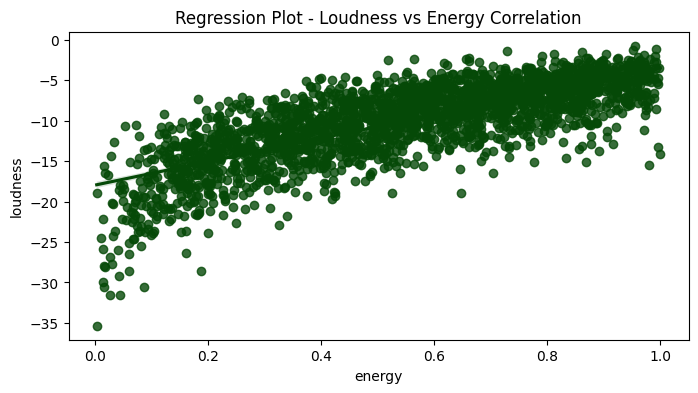

In [41]:
plt.figure(figsize=(8,4))
sns.regplot(data=sample_sp, y='loudness', x='energy', color='#054907').set(title='Regression Plot - Loudness vs Energy Correlation')

[Text(0.5, 1.0, 'Regression Plot - Popularity vs Acousticness Correlation')]

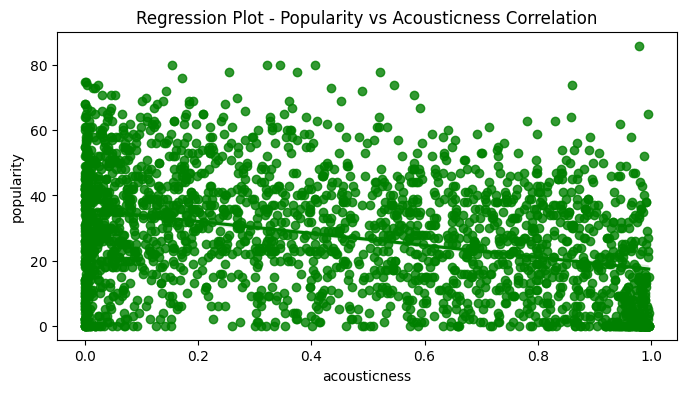

In [42]:
plt.figure(figsize=(8,4))
sns.regplot(data=sample_sp, y='popularity', x='acousticness', color='#008000').set(title='Regression Plot - Popularity vs Acousticness Correlation')

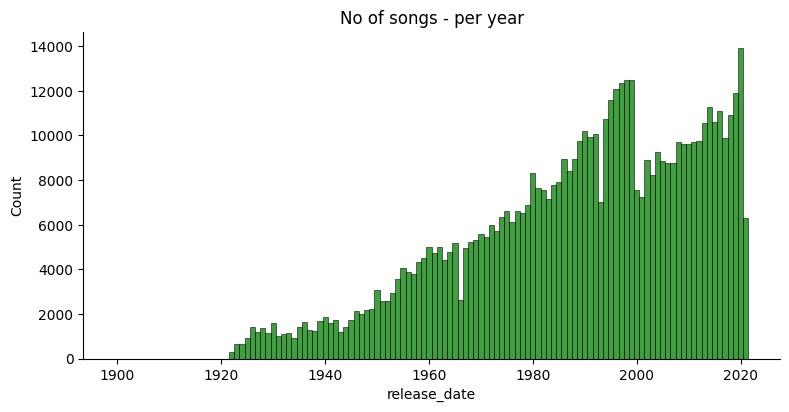

In [43]:
sns.displot(years, discrete=True, aspect=2, height=4, kind='hist',color='g').set(title='No of songs - per year')

In [45]:
tracks['id_artists_clean'] = tracks['id_artists'].str.strip("[]'\"").str.split(',').str[0]
merged_df = tracks.merge(artists[['id', 'genres']], left_on='id_artists_clean', right_on='id')

In [46]:
merged_df.head()

,id_x,name,popularity,explicit,artists,id_artists,danceability,energy,key,loudness,...,instrumentalness,liveness,valence,tempo,time_signature,hit,duration,id_artists_clean,id_y,genres
0,35iwgR4jXetI318WEWsa1Q,Carve,6,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],0.645,0.4450,0,-13.338,...,0.7440,0.151,0.127,104.851,3,False,127,45tIt06XoI0Iio4LBEVpls,45tIt06XoI0Iio4LBEVpls,[]
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],0.695,0.2630,0,-22.136,...,0.0000,0.148,0.655,102.009,1,False,98,14jtPCOoNZwquk5wd9DxrY,14jtPCOoNZwquk5wd9DxrY,[]
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],0.434,0.1770,1,-21.180,...,0.0218,0.212,0.457,130.418,5,False,182,5LiOoJbxVSAMkBS2fUm3X2,5LiOoJbxVSAMkBS2fUm3X2,"['tango', 'vintage tango']"
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],0.321,0.0946,7,-27.961,...,0.9180,0.104,0.397,169.980,3,False,177,5LiOoJbxVSAMkBS2fUm3X2,5LiOoJbxVSAMkBS2fUm3X2,"['tango', 'vintage tango']"
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],0.402,0.1580,3,-16.900,...,0.1300,0.311,0.196,103.220,4,False,163,3BiJGZsyX9sJchTqcSA7Su,3BiJGZsyX9sJchTqcSA7Su,"['adult standards', 'big band', 'easy listenin..."


In [47]:
genre_duration = merged_df.groupby('genres')['duration'].sum().sort_values(ascending=False).reset_index()

top_genres = genre_duration.head(10)

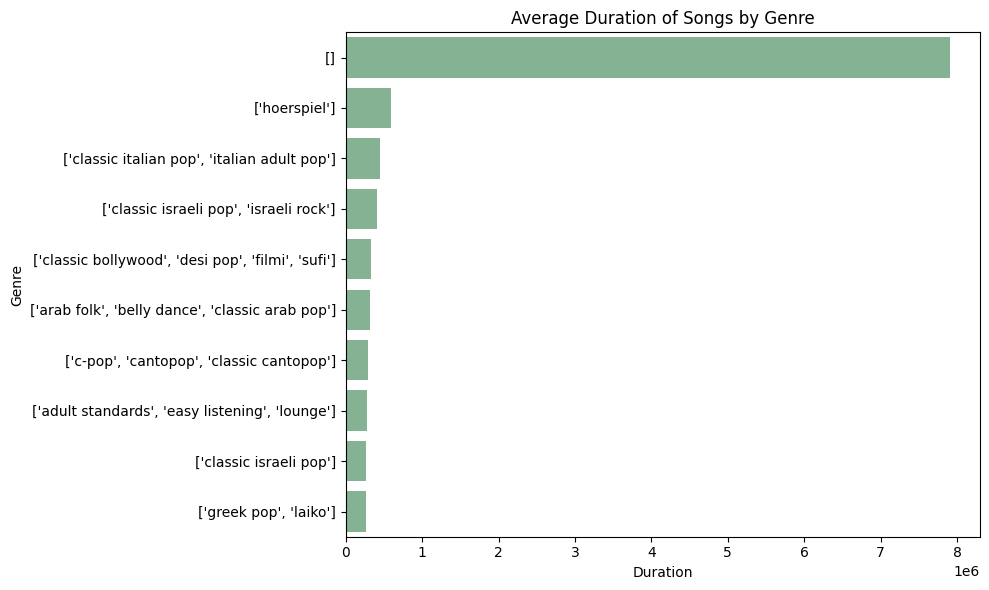

In [48]:
plt.figure(figsize=(10, 6))
sns.set_palette('crest')

sns.barplot(y='genres', x='duration', data=top_genres)

plt.title('Average Duration of Songs by Genre')
plt.xlabel('Duration')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

[Text(0.5, 1.0, 'Genres by Popularity-Top 5')]

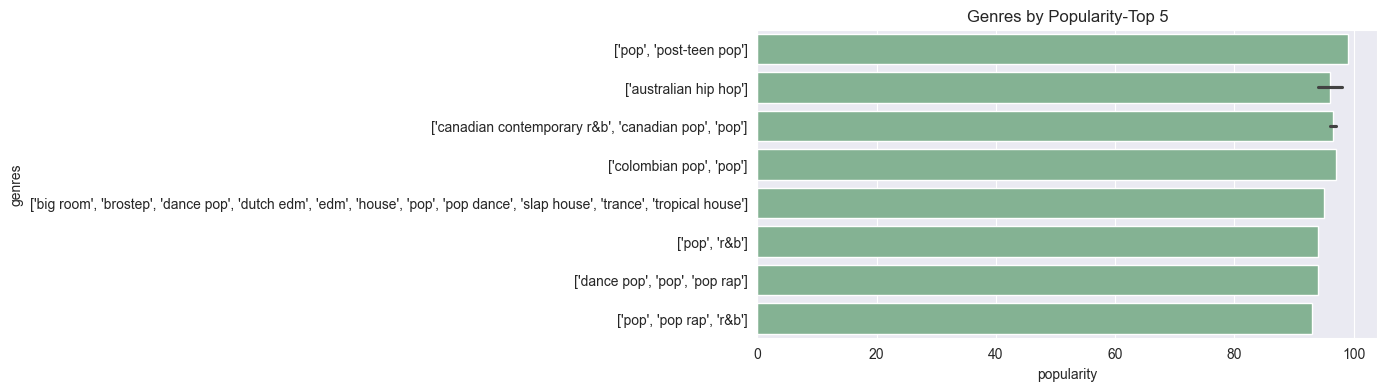

In [49]:
sns.set_style(style='darkgrid')
plt.figure(figsize=(8,4))
Top = merged_df.sort_values('popularity', ascending=False)[:10]
sns.barplot(y = 'genres', x = 'popularity', data = Top).set(title='Genres by Popularity-Top 5')